In [3]:
import pandas as pd

# Load your datasets
adidas_sales_data = pd.read_excel('C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Adidas US Sales Datasets.xlsx', skiprows=4)
shoe_prices_data = pd.read_csv('C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Shoe prices.csv')

# Display the first few rows of each dataset for inspection
print("Adidas US Sales Dataset:")
print(adidas_sales_data.head())

print("\nShoe Prices Dataset:")
print(shoe_prices_data.head())

# Check for missing values in both datasets
print("\nMissing values in Adidas US Sales Dataset:")
print(adidas_sales_data.isnull().sum())

print("\nMissing values in Shoe Prices Dataset:")
print(shoe_prices_data.isnull().sum())

Adidas US Sales Dataset:
   Unnamed: 0     Retailer  Retailer ID Invoice Date     Region     State  \
0         NaN  Foot Locker      1185732   2020-01-01  Northeast  New York   
1         NaN  Foot Locker      1185732   2020-01-02  Northeast  New York   
2         NaN  Foot Locker      1185732   2020-01-03  Northeast  New York   
3         NaN  Foot Locker      1185732   2020-01-04  Northeast  New York   
4         NaN  Foot Locker      1185732   2020-01-05  Northeast  New York   

       City                    Product  Price per Unit  Units Sold  \
0  New York      Men's Street Footwear            50.0        1200   
1  New York    Men's Athletic Footwear            50.0        1000   
2  New York    Women's Street Footwear            40.0        1000   
3  New York  Women's Athletic Footwear            45.0         850   
4  New York              Men's Apparel            60.0         900   

   Total Sales  Operating Profit  Operating Margin Sales Method  
0     600000.0          3

In [4]:
# Drop the unnecessary column in Adidas dataset
adidas_sales_data.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'Invoice Date' to datetime format
adidas_sales_data['Invoice Date'] = pd.to_datetime(adidas_sales_data['Invoice Date'])

# Check data types and look for anomalies
print(adidas_sales_data.info())
print(adidas_sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.244761          0.422991  
min       0.000000       0.000000          0.000000          0.100000  
25%     106.000000    4254.500000       1921.752500          0.350000  
50%     1

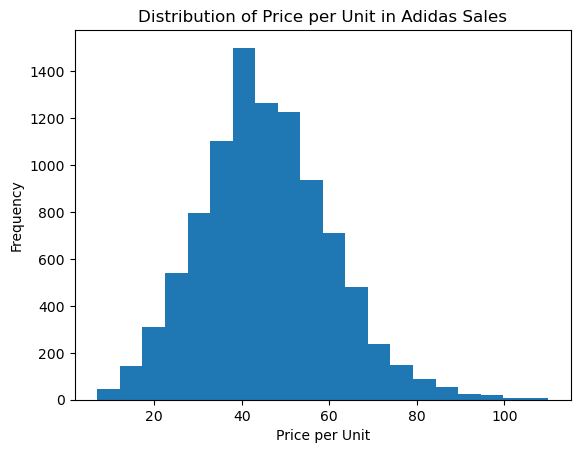

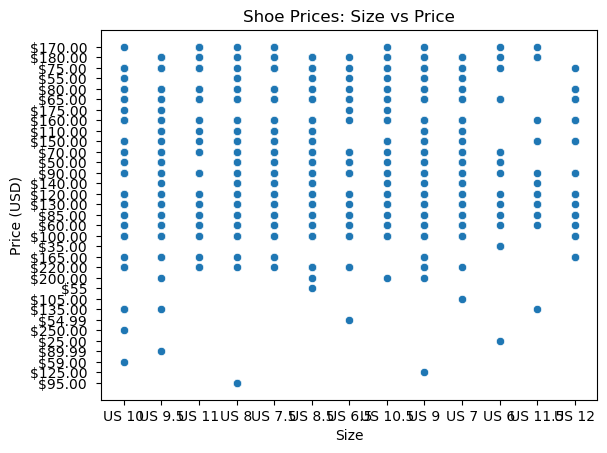

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(adidas_sales_data.describe())
print(shoe_prices_data.describe())

# Visualization examples
# Histogram of Price per Unit in Adidas Sales Data
plt.hist(adidas_sales_data['Price per Unit'], bins=20)
plt.title('Distribution of Price per Unit in Adidas Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Shoe Prices Data (Price vs. Size as an example)
sns.scatterplot(data=shoe_prices_data, x='Size', y='Price (USD)')
plt.title('Shoe Prices: Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price (USD)')
plt.show()


        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.244761          0.422991  
min       0.000000       0.000000          0.000000          0.100000  
25%     106.000000    4254.500000       1921.752500          0.350000  
50%     1

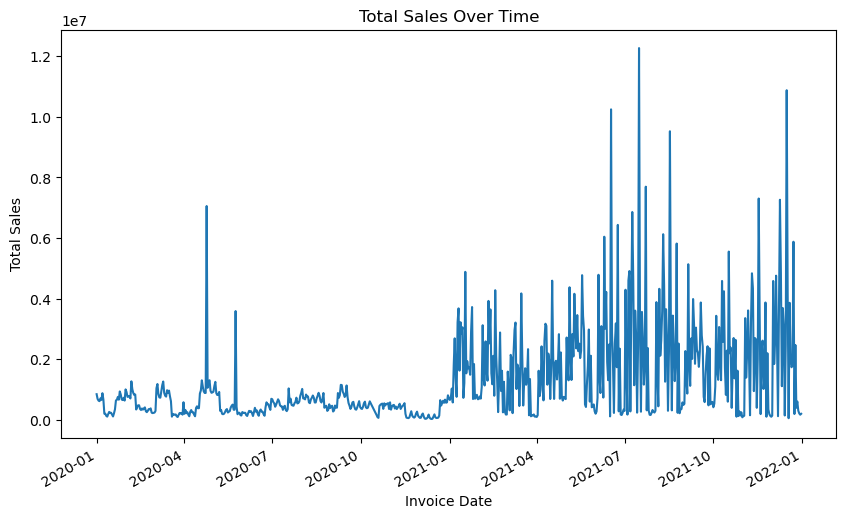

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(adidas_sales_data.describe())
print(shoe_prices_data.describe())

# Visualization - Sales Trend Over Time
adidas_sales_data['Invoice Date'] = pd.to_datetime(adidas_sales_data['Invoice Date'])
plt.figure(figsize=(10, 6))
adidas_sales_data.groupby('Invoice Date')['Total Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.show()

In [7]:
# Using 'Price per Unit', 'Units Sold', and 'Operating Margin' as features
features = adidas_sales_data[['Price per Unit', 'Units Sold', 'Operating Margin']]
target = adidas_sales_data['Total Sales']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 49420.80984304064


In [11]:
# Feature importance
importance = model.coef_
for i, v in enumerate(importance):
    print(f'Feature: {features.columns[i]}, Score: {v}')

Feature: Price per Unit, Score: 1988.3037336883385
Feature: Units Sold, Score: 552.8572777584073
Feature: Operating Margin, Score: -117592.99443213227


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load your datasets
adidas_sales_data = pd.read_excel('C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Adidas US Sales Datasets.xlsx', skiprows=4)
shoe_prices_data = pd.read_csv('C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Shoe prices.csv')

# Example: Encoding categorical variables in the shoe prices dataset
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(shoe_prices_data[['Brand', 'Type', 'Gender', 'Material']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Brand', 'Type', 'Gender', 'Material']))

# Merge encoded data with the numerical columns from shoe_prices_data
final_shoe_prices_data = pd.concat([encoded_df, shoe_prices_data[['Price (USD)']]], axis=1)

C:\Users\Musti Tanvir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Model Coefficients for insight
print("Model Coefficients:")
print(model.coef_)

Model Coefficients:
[   1988.30373369     552.85727776 -117592.99443213]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Select relevant features for predictive analysis (customize as needed)
features = ['Price per Unit', 'Units Sold', 'Operating Margin']
X = adidas_sales_data[features]
y = adidas_sales_data['Total Sales']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
predictions = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Random Forest RMSE: {rmse}')

Random Forest RMSE: 11766.948769147162


C:\Users\Musti Tanvir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Musti Tanvir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


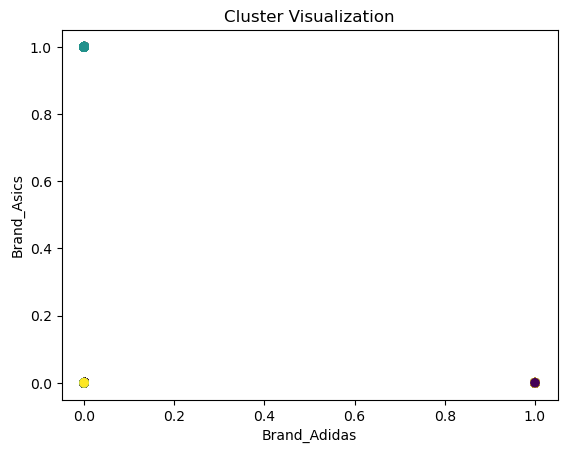

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'final_shoe_prices_data' is the prepared dataset from earlier steps
# Select features for clustering (e.g., price, brand)
features = ['Price (USD)'] # Add more features as necessary
X = final_shoe_prices_data[features]

# Convert 'Price (USD)' to float after removing the dollar sign and any other non-numeric characters
final_shoe_prices_data['Price (USD)'] = final_shoe_prices_data['Price (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Feature names from OneHotEncoder
feature_names = encoder.get_feature_names_out(['Brand', 'Type', 'Gender', 'Material'])

# Select features for clustering
X = final_shoe_prices_data[feature_names]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Example: Visualize the clusters (using first two encoded features for simplicity)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Cluster Visualization')
plt.show()


In [22]:
# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Print out the centroids
print("Cluster centroids: \n", centroids)

# Investigate the distribution within clusters
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i}:")
    members = (clusters == i)
    print(X[members].describe())

Cluster centroids: 
 [[ 7.25388601e-02 -1.24900090e-16  1.01036269e-01  1.52849741e-01
   8.54922280e-02  1.89119171e-01  1.16580311e-01  1.58031088e-01
   1.81347150e-02  1.06217617e-01  1.01036269e-01  3.49740933e-01
   2.59067358e-03  7.77202073e-03  2.33160622e-02  1.21761658e-01
   1.30104261e-18  7.51295337e-02  2.59067358e-03  5.18134715e-03
   1.08808290e-01  1.06217617e-01 -1.30104261e-18  7.77202073e-03
   5.18134715e-03  5.69948187e-02  1.55440415e-02  1.03626943e-02
   1.00000000e+00 -7.77156117e-16  1.55440415e-01  6.50521303e-19
   5.18134715e-03  7.77202073e-03  2.59067358e-03  6.50521303e-19
   6.50521303e-19  2.07253886e-02  2.07253886e-02  5.18134715e-03
   3.03108808e-01  2.59067358e-03  5.18134715e-03  6.47668394e-02
   4.66321244e-02  6.50521303e-19  6.50521303e-19  4.40414508e-02
   1.81347150e-02  5.18134715e-03  4.92227979e-02  6.50521303e-19
   2.59067358e-02  3.62694301e-02  5.18134715e-03  5.69948187e-02
   5.18134715e-03  5.18134715e-03  7.51295337e-02  1.29

In [24]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 1 (0.8647665635864089)
2. feature 0 (0.11954542680523493)
3. feature 2 (0.015688009608356247)


In [26]:
# For a more detailed analysis, map the centroid values to actual feature names
centroid_df = pd.DataFrame(centroids, columns=feature_names)

# Display each centroid with feature names for better interpretation
print(centroid_df)

# For each cluster, you could look at examples of actual products
for i in range(kmeans.n_clusters):
    print(f"\nProducts in Cluster {i}:")
    cluster_products = shoe_prices_data.iloc[clusters == i, :]
    print(cluster_products)

   Brand_Adidas   Brand_Asics  Brand_Converse    Brand_Fila  \
0      0.072539 -1.249001e-16    1.010363e-01  1.528497e-01   
1      0.009494  3.132911e-01   -1.110223e-16 -2.081668e-16   
2      0.226974  3.289474e-03    2.006579e-01  1.315789e-01   

   Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  Brand_Skechers  \
0           0.085492    0.189119    0.116580      0.158031        0.018135   
1           0.161392    0.110759    0.113924      0.063291        0.227848   
2           0.052632    0.032895    0.062500      0.062500        0.032895   

     Brand_Vans  ...  Material_Suede/Leather  Material_Suede/Mesh  \
0  1.062176e-01  ...            5.181347e-03             0.056995   
1 -1.110223e-16  ...           -6.938894e-18             0.003165   
2  1.940789e-01  ...            1.315789e-02             0.029605   

   Material_Suede/Nylon  Material_Suede/Textile  Material_Synthetic  \
0          5.181347e-03            5.181347e-03        7.512953e-02   
1         -4.33

In [30]:
# Aggregate total sales per product category
product_sales = adidas_sales_data.groupby('Product')['Total Sales'].sum().reset_index()

# Sort the product categories by total sales in descending order
product_sales_sorted = product_sales.sort_values('Total Sales', ascending=False)

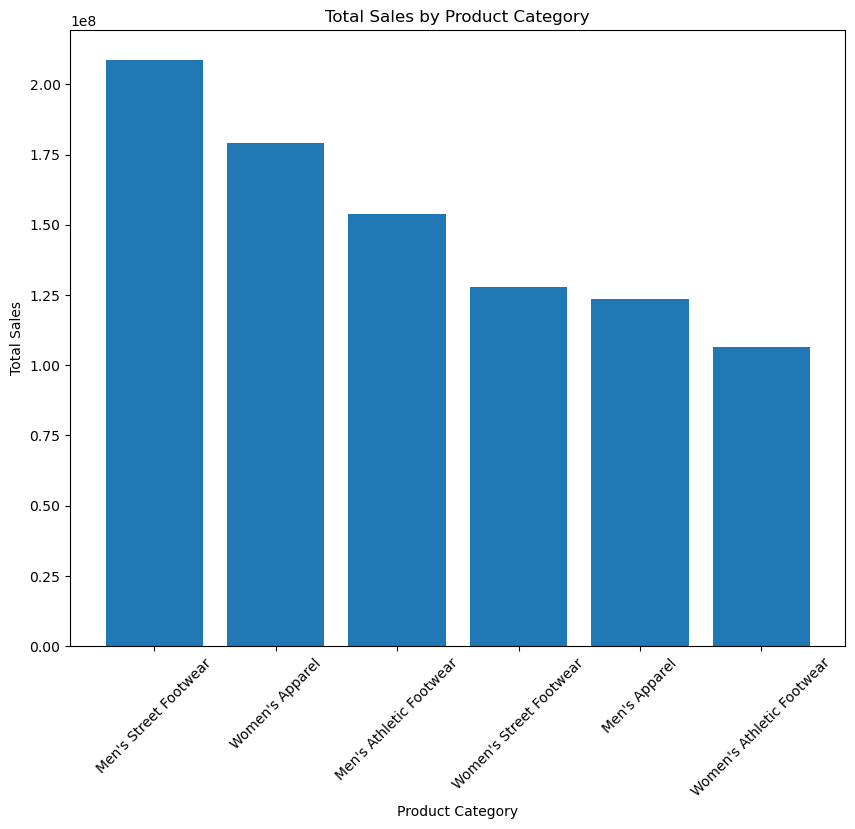

In [31]:
# Visualize the sales data
plt.figure(figsize=(10, 8))
plt.bar(product_sales_sorted['Product'], product_sales_sorted['Total Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()


In [33]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Product' category for use in the model
encoder = OneHotEncoder(sparse=False)
product_encoded = encoder.fit_transform(adidas_sales_data[['Product']])
product_encoded_df = pd.DataFrame(product_encoded, columns=encoder.get_feature_names_out(['Product']))

# Include the encoded product categories in your feature set for modeling
X = pd.concat([adidas_sales_data[['Price per Unit', 'Units Sold', 'Operating Margin']], product_encoded_df], axis=1)
y = adidas_sales_data['Total Sales']

# Continue with the train-test split and model fitting as before


C:\Users\Musti Tanvir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


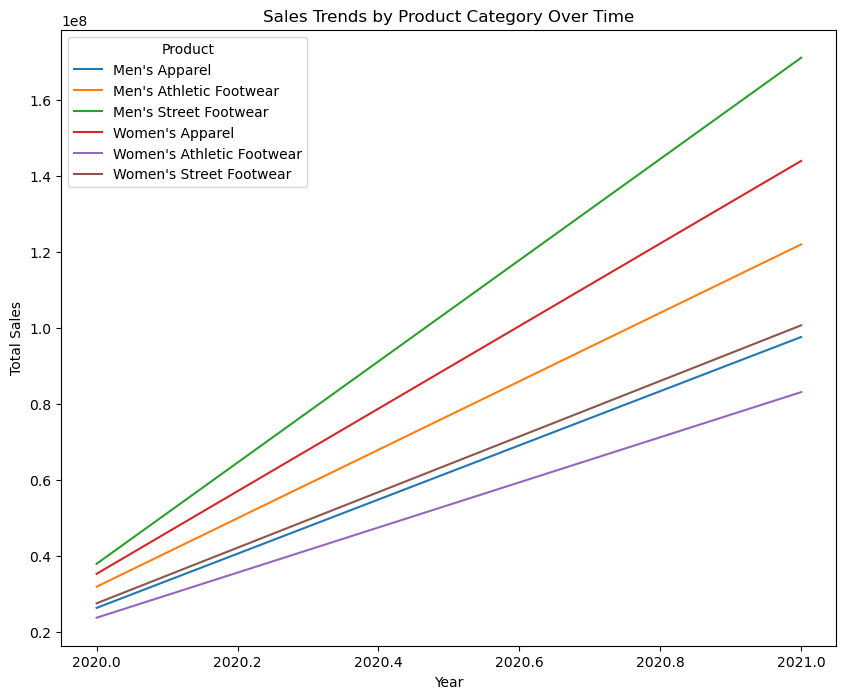

In [34]:
# Analyze trends over time for each product category
adidas_sales_data['Year'] = adidas_sales_data['Invoice Date'].dt.year
sales_trends = adidas_sales_data.groupby(['Year', 'Product'])['Total Sales'].sum().unstack()
sales_trends.plot(kind='line', figsize=(10, 8))
plt.title('Sales Trends by Product Category Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [5]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Shoe prices.csv'
df = pd.read_csv(file_path)

# Ensure the 'Price' column is in the correct numeric format, removing any currency symbols and converting to float
df['Price (USD)'] = df['Price (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Filter rows where the Brand is Adidas
adidas_sales = df[df['Brand'] == 'Adidas']

# Calculate the mean of the Price column for Adidas sales
mean_price = adidas_sales['Price (USD)'].mean()

print(f"The mean price of Adidas shoes is: ${mean_price:.2f}")

# Find the most repeated variable in the type column for Adidas
most_common_type = adidas_sales['Type'].mode()[0]
print("Most repeated type for Adidas shoes:", most_common_type)


The mean price of Adidas shoes is: $146.55
Most repeated type for Adidas shoes: Lifestyle


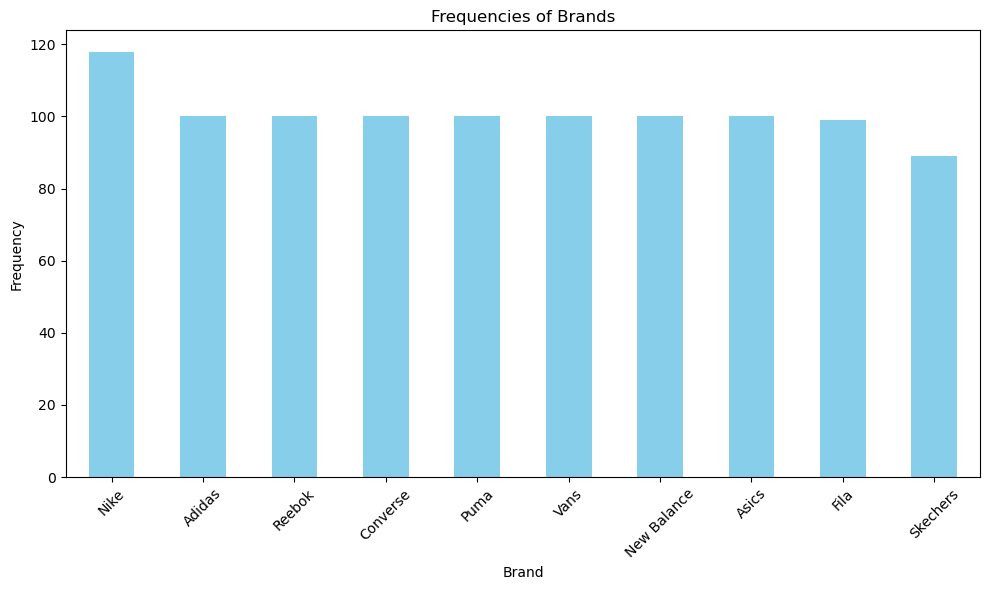

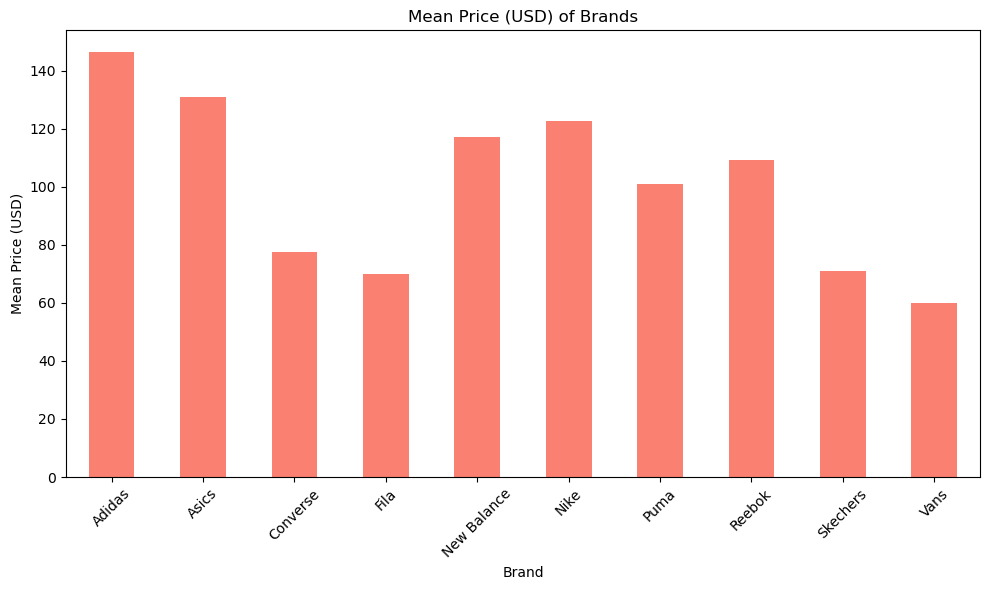

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Shoe prices.csv'
df = pd.read_csv(file_path)

# Ensure the 'Price' column is in the correct numeric format, removing any currency symbols and converting to float
df['Price (USD)'] = df['Price (USD)'].replace('[\$,]', '', regex=True).astype(float)

# Calculate frequencies of each brand
brand_frequencies = df['Brand'].value_counts()

# Plot the frequencies in a bar chart
plt.figure(figsize=(10, 6))
brand_frequencies.plot(kind='bar', color='skyblue')
plt.title('Frequencies of Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the mean of 'Price (USD)' for each brand
brand_price_means = df.groupby('Brand')['Price (USD)'].mean()

# Plot the mean prices in a bar chart
plt.figure(figsize=(10, 6))
brand_price_means.plot(kind='bar', color='salmon')
plt.title('Mean Price (USD) of Brands')
plt.xlabel('Brand')
plt.ylabel('Mean Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

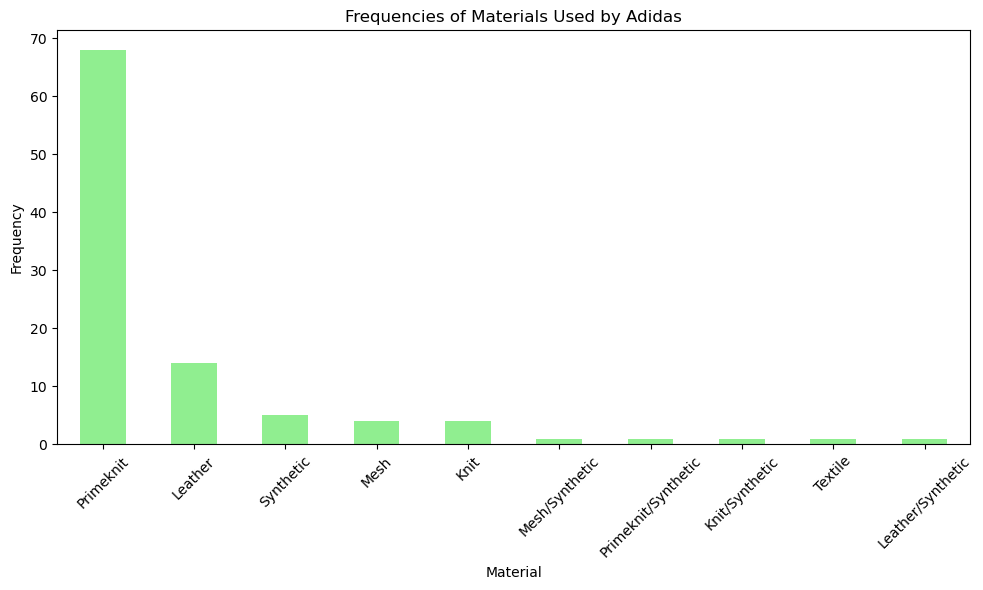

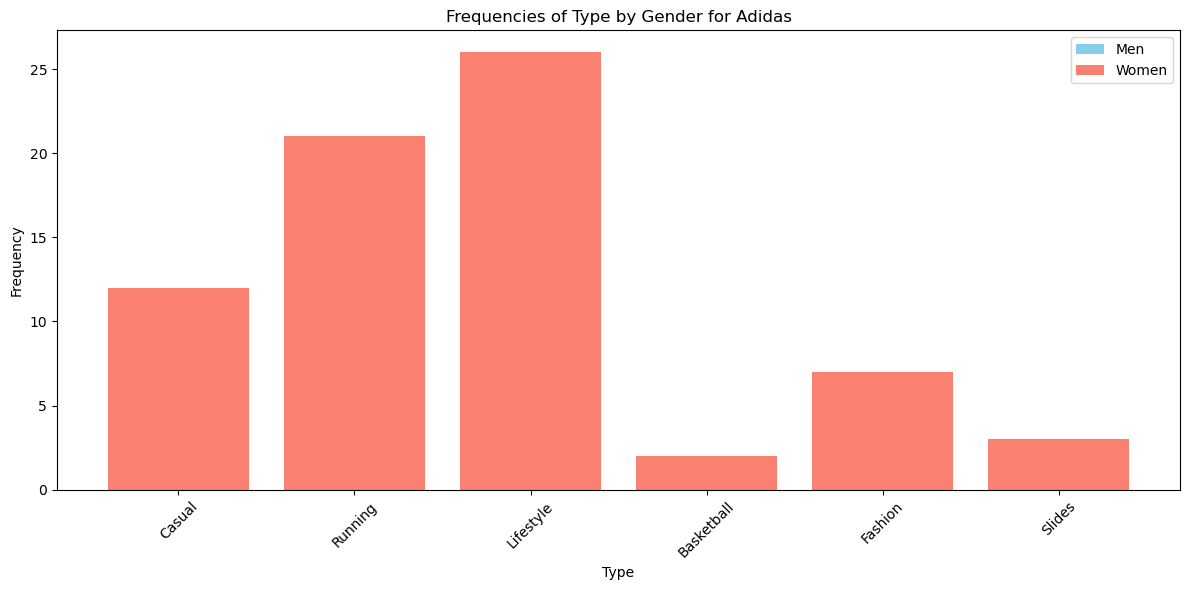

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Musti Tanvir/PycharmProjects/AdidasPrediction/dataset/Shoe prices.csv'
df = pd.read_csv(file_path)

# Filter the dataframe for Adidas brand
adidas_df = df[df['Brand'] == 'Adidas']

# Calculate frequencies of each material for Adidas
material_frequencies = adidas_df['Material'].value_counts()

# Plot the frequencies of materials used by Adidas in a bar chart
plt.figure(figsize=(10, 6))
material_frequencies.plot(kind='bar', color='lightgreen')
plt.title('Frequencies of Materials Used by Adidas')
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Separate Type feature based on gender for Adidas
men_type_frequencies = adidas_df[adidas_df['Gender'] == 'Men']['Type'].value_counts()
women_type_frequencies = adidas_df[adidas_df['Gender'] == 'Women']['Type'].value_counts()

# Plot the frequencies of Type by gender for Adidas
plt.figure(figsize=(12, 6))
plt.bar(men_type_frequencies.index, men_type_frequencies.values, color='skyblue', label='Men')
plt.bar(women_type_frequencies.index, women_type_frequencies.values, color='salmon', label='Women')
plt.title('Frequencies of Type by Gender for Adidas')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
